In [248]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# STEP 1

In [299]:
df = pd.read_csv("./acs2015_county_data.csv")

In [300]:
df.iloc[0]

CensusId              1001
State              Alabama
County             Autauga
TotalPop             55221
Men                  26745
Women                28476
Hispanic               2.6
White                 75.8
Black                 18.5
Native                 0.4
Asian                  1.0
Pacific                0.0
Citizen              40725
Income             51281.0
IncomeErr           2391.0
IncomePerCap         24974
IncomePerCapErr       1080
Poverty               12.9
ChildPoverty          18.6
Professional          33.2
Service               17.0
Office                24.2
Construction           8.6
Production            17.1
Drive                 87.5
Carpool                8.8
Transit                0.1
Walk                   0.5
OtherTransp            1.3
WorkAtHome             1.8
MeanCommute           26.5
Employed             23986
PrivateWork           73.6
PublicWork            20.9
SelfEmployed           5.5
FamilyWork             0.0
Unemployment           7.6
N

In [301]:
df = df.drop_duplicates(['County'])

In [302]:
df = df[['County', 'Drive', 'Unemployment', 'SelfEmployed']]

In [303]:
subsample_columns = ['Drive', 'Unemployment', 'SelfEmployed']

In [304]:
df.head()

,County,Drive,Unemployment,SelfEmployed
0,Autauga,87.5,7.6,5.5
1,Baldwin,84.7,7.5,5.8
2,Barbour,83.8,17.6,7.3
3,Bibb,83.2,8.3,6.7
4,Blount,84.9,7.7,4.2


In [305]:
df['County'] = df['County'].factorize()[0]
df.rename(columns={'County': 'county_id'})

,county_id,Drive,Unemployment,SelfEmployed
0,0,87.5,7.6,5.5
1,1,84.7,7.5,5.8
2,2,83.8,17.6,7.3
3,3,83.2,8.3,6.7
4,4,84.9,7.7,4.2
...,...,...,...,...
3215,1923,89.1,15.2,4.1
3216,1924,69.1,12.2,13.6
3217,1925,82.0,25.9,13.1
3218,1926,86.0,24.3,7.3


# STEP 2

In [309]:
def plot_hist_kde(data, column_name):
    plt.figure(figsize=(10, 8))

    kernel = scipy.stats.gaussian_kde(data)

    min_amount, max_amount = data.min(), data.max()
    x = np.linspace(min_amount, max_amount, len(data))
    kde_values = kernel(x)

    sns.distplot(data, kde=False, norm_hist=True, label=f'{column_name}')
    plt.plot(x, kde_values)

    plt.ylabel('Percents')
    plt.xlabel(column_name)
    plt.legend()
    plt.show()

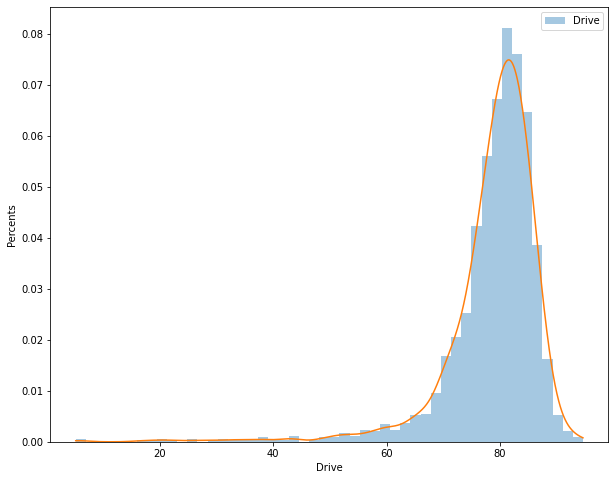

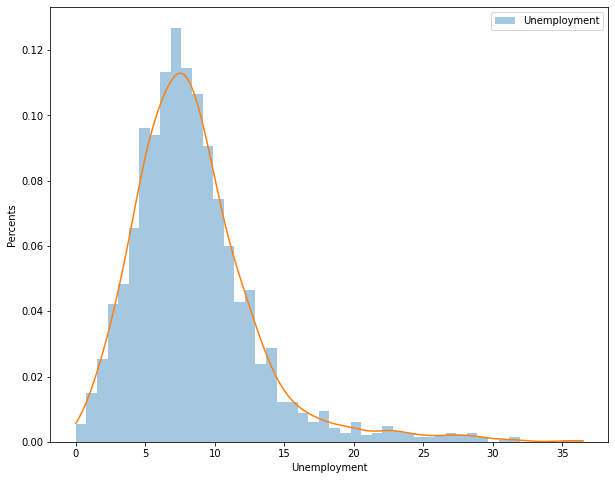

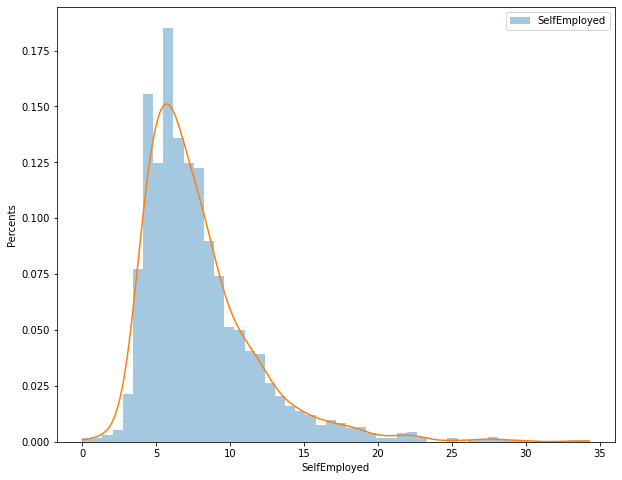

In [318]:
for sample_column in subsample_columns:
    plot_hist_kde(df[sample_column], sample_column)

# STEP 3


In [415]:
def plot_whiskers(data, ax):
    mean = data.mean()
    var = data.var()
    std = data.std()
    median = data.median()

    print('mean - {}; variance - {}; std - {}; median - {}'.format(mean, var, std, median))

#     plt.figure(figsize=(10, 8))
    sns.boxplot(x=data, ax=ax)

mean - 78.68179460580913; variance - 72.31314529873582; std - 8.503713618104493; median - 80.4
mean - 8.44859958506224; variance - 20.241046299366722; std - 4.499005034378904; median - 7.8
mean - 7.8911307053941915; variance - 14.888706972009468; std - 3.858588728020838; median - 6.9


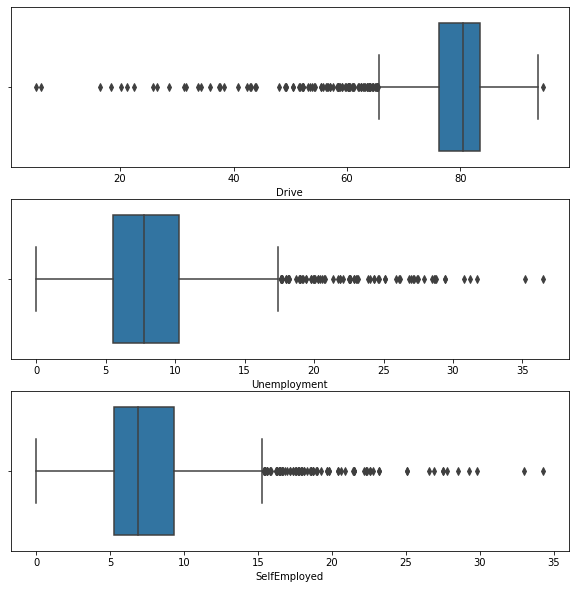

In [416]:
fig, axs = plt.subplots(len(subsample_columns), figsize=(10, 10))

for i, sample_column in enumerate(subsample_columns):
    plot_whiskers(df[sample_column], axs[i])

fig.show()
# for sample_column in subsample_columns:
#     plot_whiskers(df[sample_column])

# STEP 4

In [363]:
from distfit import distfit

dist = distfit()        # Specify desired parameters
dist.fit_transform(df['Unemployment'])

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0085125] [loc=8.449 scale=4.498]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.0559531] [loc=0.000 scale=8.449]
[distfit] >[pareto    ] [0.10 sec] [RSS: 0.0484526] [loc=-4867148.435 scale=4867148.435]
[distfit] >[dweibull  ] [0.01 sec] [RSS: 0.0029034] [loc=7.849 scale=3.226]
[distfit] >[t         ] [0.06 sec] [RSS: 0.0022154] [loc=7.822 scale=3.009]
[distfit] >[genextreme] [0.08 sec] [RSS: 0.0027570] [loc=6.471 scale=3.329]
[distfit] >[gamma     ] [0.04 sec] [RSS: 0.0032963] [loc=-0.991 scale=1.933]
[distfit] >[lognorm   ] [0.09 sec] [RSS: 0.0028187] [loc=-3.643 scale=11.377]
[distfit] >[beta      ] [0.11 sec] [RSS: 0.0037090] [loc=-0.755 scale=6513423.713]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.0709350] [loc=0.000 scale=36.500]
[distfit] >[loggamma  ] [0.08 sec] [RSS: 0.0093299] [loc=-1672.808 scale=218.083]
[distfit] >Compute confidence interval [parametric]


{'model': {'distr': <scipy.stats._continuous_distns.t_gen at 0x13ec93780>,
  'stats': 'RSS',
  'params': (3.488645102626391, 7.822218420620554, 3.0089647788756255),
  'name': 't',
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x146eae748>,
  'score': 0.0022154368109426354,
  'loc': 7.822218420620554,
  'scale': 3.0089647788756255,
  'arg': (3.488645102626391,),
  'CII_min_alpha': 1.1276429134525499,
  'CII_max_alpha': 14.516793927788555},
 'summary':          distr     score  LLE             loc           scale  \
 0            t  0.002215  NaN        7.822218        3.008965   
 1   genextreme  0.002757  NaN        6.471464        3.329325   
 2      lognorm  0.002819  NaN       -3.643154       11.377001   
 3     dweibull  0.002903  NaN        7.849055        3.225503   
 4        gamma  0.003296  NaN       -0.990812        1.932568   
 5         beta  0.003709  NaN       -0.754803  6513423.712546   
 6         norm  0.008513  NaN          8.4486        4.497838   
 7   

In [387]:
from distfit import distfit
import json
def find_best_model(data):
    dist = distfit()       
    dist.fit_transform(data, verbose=1)
    print(dist.model['name'])
    print(dist.model['params'])
    return dist.model['name'], dist.model['params']

In [388]:
best_distrb = []
for sample_column in subsample_columns:
    best_params = find_best_model(df[sample_column])
    best_distrb.append((best_params[0], best_params[1]))

loggamma
(0.6478725378870471, 84.25415545769711, 4.046282093389864)
t
(3.488645102626391, 7.822218420620554, 3.0089647788756255)
genextreme
(-0.11279887596423521, 6.151678291934634, 2.4563616452166275)


# STEP 5

In [408]:
from scipy.optimize import newton
from scipy.special import psi, polygamma
from scipy.stats import gamma

def fn_least_sq(df, n=100):
    
    x = np.linspace(df.min(), df.max(), len(df))
    y = df.to_numpy()

    mean_x = np.mean(x)
    mean_y = np.mean(y)

    numer = 0
    denom = 0
    
    for i in range(n):
        numer += (x[i] - mean_x) * (y[i] - mean_y)
        denom += (x[i] - mean_x) ** 2

    alpha = numer / denom
    beta = mean_y - (alpha * mean_x)
    
    return alpha, beta

def make_mle_and_ls(data, i, axs, column_name, distr="gamma"):
    res = getattr(scipy.stats.distributions, distr).fit(data)
    
    a_mle, alpha_mle, beta_mle = res
    alpha_ls, beta_ls = fn_least_sq(data)
    data.hist(density=True, figsize=(12, 8), bins=10, grid=False, ax=axs[i])
    
    x = np.linspace(0, data.max())
    
    axs[i].plot(x, getattr(scipy.stats.distributions, distr).pdf(x, *res), 'r-')
#     axs[i].plot(x, getattr(scipy.stats.distributions, distr).pdf(x, alpha_ls, beta_ls), 'y-')
    axs[i].legend([distr])
    axs[i].set_title(column_name)
#     axs[i].legend(["MLE", "LS"])

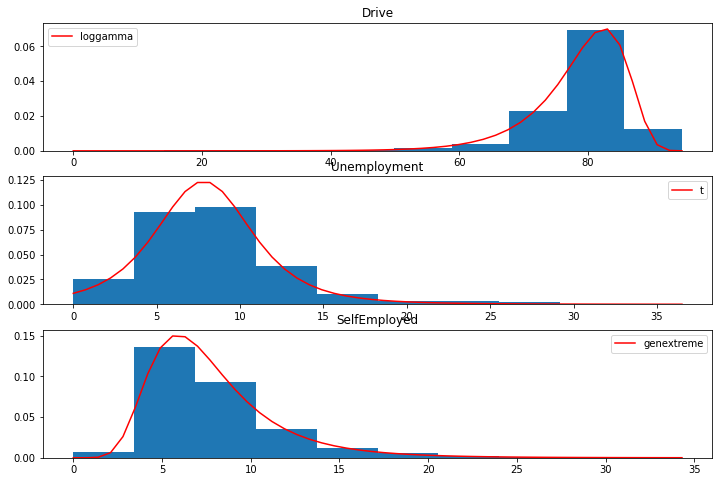

In [409]:
fig, axs = plt.subplots(len(subsample_columns), figsize=(10, 10))

for i, sample_column in enumerate(subsample_columns):
    distb_name, distrb_params = best_distrb[i]
    make_mle_and_ls(df[sample_column], i, axs, sample_column, distb_name)

fig.show()

# STEP 6

In [398]:
import math
from scipy.stats import gamma

def build_qq_plot(data, column_name, params, ax, distr):
    percs = np.linspace(0, 100, 21)

    qn_first = getattr(scipy.stats.distributions, distr).ppf(percs / 100.0, *params)
    qn_second = np.percentile(data, percs)
    
    
    def remove_inf(first_arr, second_arr):
        res1, res2 = [], []
        for first, second in zip(first_arr, second_arr):
            if not math.isinf(first) and not math.isinf(second):
                res1.append(first)
                res2.append(second)
        return np.array(res1), np.array(res2)
    
    qn_first, qn_second = remove_inf(qn_first, qn_second)
    min_qn = np.min([qn_first.min(), qn_second.min()])
    max_qn = np.max([qn_first.max(), qn_second.max()])
    x = np.linspace(min_qn, max_qn)

    ax.plot(qn_first, qn_second, ls="", marker="o", markersize=6)
    ax.plot(x, x)
    ax.set_xlim([min_qn, max_qn + 1])
    ax.set_ylim([min_qn, max_qn + 1])
    ax.grid(True)

    ax.set_title(column_name)

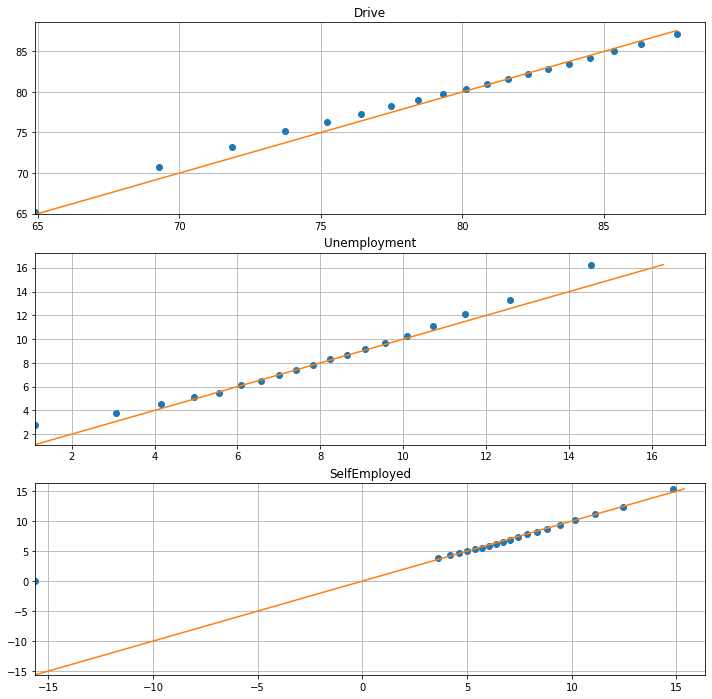

In [399]:
params = [(0.9443422711499565, 5.199999999999999, 4.156635900535228), 
          (4.884398038555704, -0.9908118306295226, 1.9325675566948866), 
          (5.431824685638236, -0.15019902589782252, 1.4804102918214228)]

fig, axs = plt.subplots(len(subsample_columns), figsize=(12, 12))
for i, sample_column in enumerate(subsample_columns):
    build_qq_plot(df[sample_column], sample_column, best_distrb[i][1], axs[i], best_distrb[i][0])
    
fig.show()

# STEP 7

In [361]:
def count_stat_tests(data, column_name, distrb, params):
    ks = scipy.stats.kstest(data, distrb, params)
    cv = scipy.stats.cramervonmises(data, distrb, params)
    print(f"Statistic for column {column_name}:")
    print(f"Kolmogorov Smirnov value: {ks.statistic}, p-value: {ks.pvalue}")
    print(f"Cramer Von Mises value: {cv.statistic}, p-value: {cv.pvalue}")

In [393]:
for i, sample_column in enumerate(subsample_columns):
    count_stat_tests(df[sample_column], sample_column, best_distrb[i][0], best_distrb[i][1])

Statistic for column Drive:
Kolmogorov Smirnov value: 0.05101181134162322, p-value: 8.442548772540304e-05
Cramer Von Mises value: 1.3008192932563272, p-value: 0.0004919177138520414
Statistic for column Unemployment:
Kolmogorov Smirnov value: 0.04381054872692052, p-value: 0.0011832974946223572
Cramer Von Mises value: 0.6693470366658855, p-value: 0.015114076197508153
Statistic for column SelfEmployed:
Kolmogorov Smirnov value: 0.03457837525951152, p-value: 0.019427086354318283
Cramer Von Mises value: 0.39230031203592675, p-value: 0.07570837971869715
